# Refugees in the US - Assessing Origins and Indicators of Peace and Development (2010-2018)


Every year hundreds of thousands of people across the global face displacement, becoming refugees, seeking shelter in a new place. Over the years, we observe that it is not just the number of refugees, but also the origin countries that have varied as well. Global affairs, the relative peace/safety of different countries, and their levels of development, are all factors that come into play when we are considering forced migration and resettlement. This project aims to analyze the origins of refugees who’ve come to the US and the interaction of development and peace of origin countries with the numbers of refugees sent and changes in refugee outflow patterns.

Delving into this data, some of the questions we wanted to discuss include:
- How have refugee numbers in the US changed from 2010 to 2018?  Are refugees numbers projected to increase or decrease?
- What are the top ten refugee-sending countries in 2010 and 2018?
- Is there any correlation between a country’s HDI and the number of refugees they send to the US in 2010 or 2018? Or perhaps a correlation between a country’s Global Peace Index (GPI) or Ranking and the number of refugees?
- If not, then is there a correlation between change in refugees sent to the US and a change in HDI or GPI during the years of 2010 and 2018?



## Data description


**What are the observations (rows) and the attributes (columns)?**
 
In this dataset, the observations consist of countries (that have sent refugees to the US) and their corresponding attributes: number of refugees to the US annually from 2010 to 2018; the HDI (human development index) of nations in  2010, and 2018; the change in HDI from 2000-2018; their most recent HDI ranking (low, medium, high), the global peace index score and ranking of nations in 2010 and 2018; and the factor by which refugee flow from each country has changed from 2010 to 2018.

**Who funded the creation of the dataset?**

This dataset is an aggregation of numerous data sources including: the Department of Homeland Security (DHS) Refugee and Asylees Data tables, United Nations Development Programmes' (UNDP) Human Development Reports Data, and the Global Peace Index. Each dataset was created by their respective departments either in the government or the United Nations.

For each of the datasets used, the governing institutions such as the US DHS and the UNDP funded the collection and  creation of the dataset.

**Why was this dataset created?**

This dataset was created in order to analyze patterns in refugee-sending countries to the US. Given the US is seen as a destination country and is one of the world's more wealthy nations that can accomodate displaced persons, we wanted to analyze refugee patterns and their origins to invetigate question like those listed above.

In terms of the datasets from which the final data was aggregated:

- Refugee Data into the US was created as a part of the US' immigration statistics and for the governemnt to keep a record of flows into in the country. It enables the DHS to gather data

- The HDI data is a statistical tool used by the United Nations to measure each country's overall achievement socio-economic facets of development (ie. the people's health, level of education, and quality of life). It was created in order for there to be a globally-used and standardized system of measuring the overall development of nations.

- The GPI dataset, like the HDI data, is another standardzised measurement used across the world, but it in instead measures each counry's relative peace and stability. It accounts for all kind of peace factors, from wars, political conflict, terrorism impacts, and more in order for us to map out how peace and violence ebbs and flows each country.


**What processes might have influenced what data was observed and recorded and what was not?**

In recording refugees numbers, there are numerous instances of data being withheld to limit disclosure. There are also instances where countries political borders have changed during the time period of data collected which may affect how the numbers are reported. Furthermore, this data represents refugees who immigrated legally to the US and doesn't account for possible instances where refugees may have resorted to illegal means to enter and reside within the country so there may be underreporting.

In terms of GPI instanes of grassroots level or violence in extreemyl rural regions of certain countries may have been left out. There are alos other instances of violence that may not be reported or disclosed by individuals, the involved parties, or maybe even governments themselves.


**What preprocessing was done, and how did the data come to be in the form that you are using?**

There was thorough pre-processing done seeing as the data came from various sources, we had to ensure that the information could be aggregated as smoothly as possible without errors in merging. 

The initial UNDP HDI data had extensively documented HDI from 1990 onwards so we dropped the data to focus on the years from 2000 to 2018. We also added column wherein the change in HDI per country during the periods 2000-2010 and 2010-2018 were calculated based on the previous data.

The DHS data on refugee arrivals from 2000 to 2018 was stitched together using two data tables from the fiscal years of 2010 and 2018. In combining this data we had to account for the different numbers of countries that sent refugees each year (the unique values of the countries didn't overlap perfectly so we had to manually ensure that numbers corresponded with country labels). Furthermore, we addeda column wherein we calcuated the factor by which the number of refugees sent from each origin country changed from 2010 to 2018. In this calculatoin, there were copmlications in that certain countries did not disclose the number of refugees sent in one or both of the years for the time period we were evaluating. For example, Armernia's data of refugees sent to the US in 2010 was witheld from the information we collected, thus we could not calculate the factor of change during 2010-2018.

Additionally, the data we scraped of the HDI and Peace Index were representative of many more countries than those that sent refugees to the US (the countries we wanted data for), so we had to go through a process of aligning the data and keep only figures of countries that were present in the DHS refugee dataset.



**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**
 
For the refugee data, we figure those refugees know in some capacity their immigration will be accounted for and so they're probably aware of the data collection. Knowing that refugee placements are a legal, well documented process, refugees probably expected that their data would probably be used for governmental purposes. This could include keeping track of the inflow of refugees/asylees, analyzing how many of them are illegal versus legal, all so as to inform immigration statistics and public policy.

As for the HDI and peace index data, individual persons aren't really involved since both of those measurements represent the nation as a whole and not particular individuals in the nation, so we presume that people's awareness about data collection is not significant in these measurements.


**Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).**

Raw and semi-processed data can be found at this box link:

https://cornell.box.com/s/x2qg2h9jl0aq89yg2zcg21qp49yivdf7

# Data Analysis

In [601]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("final_data.csv")
to_drop = data.columns.drop("Unnamed: 0")
data = data[to_drop]
data.head()

,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,hdi_2000,hdi_2010,hdi_2018,hdichange2010-2018,hdi_ranking,Ranking - 2010,Score - 2010,Ranking - 2018,Score - 2018,refugee_change
0,Afghanistan,515,428,481,661,753,910,"2,737","1,311",805,0.345,0.464,0.496,0.83,low,157,3.163,162.0,3.576,0.5631067961
1,Algeria,-,-,-,-,-,-,-,-,-,0.646,0.73,0.759,0.49,high,130,2.37,109.0,2.188,-
2,Angola,-,-,-,-,-,-,-,-,-,0.394,0.51,0.574,1.5,medium,80,2.02,80.0,2.031,-
3,Armenia,D,15,8,3,10,49,55,57,58,0.649,0.729,0.76,0.52,high,129,2.368,121.0,2.302,-
4,Azerbaijan,18,16,10,3,15,18,32,20,D,0.641,0.732,0.754,0.36,high,131,2.382,133.0,2.447,-


In [3]:
# Replace entries of "-", "D", or "X" with NaN values
data = data.replace(["-", "D", "X", ".."], np.nan)

In [4]:
# For purposes of adding values, replace NaN values with 0
int_data = data.replace(np.nan, "0")

In [5]:
first = data.columns[1:14]
second = data.columns[15:]
num_columns = first.append(second)

In [ ]:
# Convert all strings in dataset to floats

for col in num_columns:
    int_data[col] = [x.replace(",", "") for x in int_data[col]]
    int_data[col] = [float(x) for x in int_data[col]]

## Comparing Total Number of Refugees 2010-2018

In [540]:
# Calculate the total number of refugees for each year

total_refugees = []
for pos in range(1, 10):
    col = int_data[int_data.columns[pos]].tolist()
    total_refugees.append(sum(col))

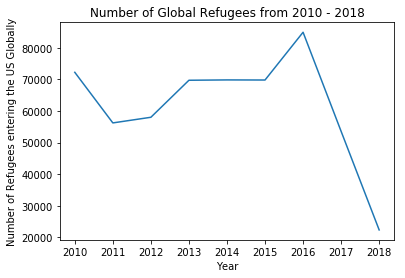

In [541]:
# Plot the number of refugees versus years
years = data.columns[1 : 10].tolist()
plt.plot(years, total_refugees)
plt.xlabel("Year")
plt.ylabel("Number of Refugees entering the US Globally")
plt.title("Number of Global Refugees from 2010 - 2018")
plt.show()

We see a spike in 2016 and then a huge derease of around 60,000 refugees in 2018. What might have caused the spike? Upon further investigation, we found that the spike aligned with the increased entry of primarily Syrian refugees during the year of 2016 as per the Obama' administration's attempt to welcome and resettle 10,000 refugees from Syria.

Further research found that, unsurprisingly, the Trump administration cut the refugee cap in 2018 to 30,000, resulting in the decrease in the inflow of refugees into the U.S. The trajectory of this decrease is expected to plummet further with the refugee cap now at 18,00 for the 2020 fiscal year (*Pew Research Center*).

## Top 10 Refugee-Sending Countries in 2010 and 2018

In [542]:
# Determining the countries that sent the most number of refugees to ths US in 2010

int_data_10 = int_data[["Country", "2010"]].copy()
top_10_2010 = int_data_10.nlargest(10, "2010")

In [543]:
top_10_2010

,Country,2010
35,Iraq,18016.0
49,Myanmar,16693.0
6,Bhutan,12363.0
57,Somalia,4884.0
19,Cuba,4818.0
34,Iran,3543.0
15,Congo (Democratic Republic),3174.0
24,Eritrea,2570.0
68,Vietnam,873.0
26,Ethiopia,668.0


In [544]:
top_10_countries = top_10_2010["Country"].tolist()
for pos in range(len(top_10_countries)):
    if(top_10_countries[pos] == "Congo (Democratic Republic)"):
        top_10_countries[pos] = "Congo (DR)"

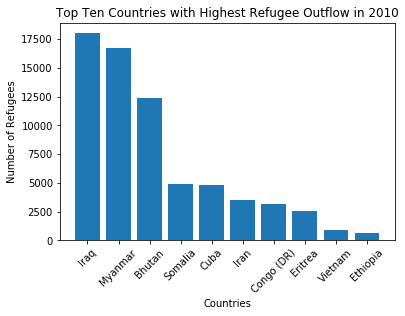

In [545]:
plt.bar([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], top_10_2010["2010"], tick_label = top_10_countries)
plt.xticks(rotation=45)
plt.xlabel("Countries")
plt.ylabel("Number of Refugees")
plt.title("Top Ten Countries with Highest Refugee Outflow in 2010")
plt.show()

In [546]:
# Determining the countries that sent the most number of refugees to ths US in 2018

int_data_18 = int_data[["Country", "2018"]].copy()
top_10_2018 = int_data_18.nlargest(10, "2018")

In [547]:
top_10_2018

,Country,2018
15,Congo (Democratic Republic),7878.0
49,Myanmar,3555.0
66,Ukraine,2635.0
6,Bhutan,2228.0
24,Eritrea,1269.0
0,Afghanistan,805.0
22,El Salvador,725.0
52,Pakistan,441.0
53,Russia,437.0
26,Ethiopia,376.0


In [548]:
top_10_countries = top_10_2018["Country"].tolist()
for pos in range(len(top_10_countries)):
    if(top_10_countries[pos] == "Congo (Democratic Republic)"):
        top_10_countries[pos] = "Congo (DR)"

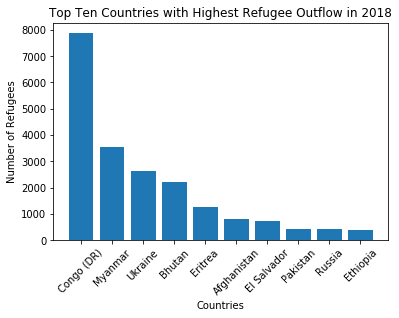

In [596]:
plt.bar([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], top_10_2018["2018"], tick_label = top_10_countries)
plt.xticks(rotation=45)
plt.xlabel("Countries")
plt.ylabel("Number of Refugees")
plt.title("Top Ten Countries with Highest Refugee Outflow in 2018")
plt.show()

## Country-wise Comparison of the Global Peace Index ranking to the Refugee Output in 2010

Here, we investigate if there exists any correlation between the refugee outflows from a given country to the US and that said country's Global Peace Index Ranking. We hypothesize that a higher ranking (i.e one that indicates a lower pece index score) could indicate increased refugee outflows.

In [550]:
countries = data["Country"]

In [551]:
data_2010 = int_data[["Country", "2010", "Ranking - 2010"]].copy()
data_2010 = data_2010[(data_2010 != 0).all(1)]

In [552]:
model_2010 = LinearRegression().fit(data_2010[["2010"]], data_2010["Ranking - 2010"])

In [553]:
slope_2010 = model_2010.coef_[0]
intercept_2010 = model_2010.intercept_
y = slope_2010 * data_2010["2010"] + intercept_2010
print("Slope =", slope_2010)
print("Y-intercept =", intercept_2010)
print("r^2 =", model_2010.score(data_2010[["2010"]], data_2010["Ranking - 2010"]))

Slope = 0.0012943796174515493
Y-intercept = 111.39173694091397
r^2 = 0.01769711736489543


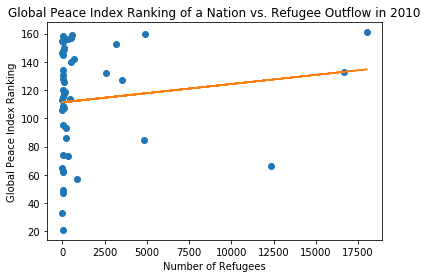

In [554]:
plt.plot(data_2010["2010"], data_2010["Ranking - 2010"], 'o')
plt.xlabel("Number of Refugees")
plt.ylabel("Global Peace Index Ranking")
plt.title("Global Peace Index Ranking of a Nation vs. Refugee Outflow in 2010")
plt.plot(data_2010["2010"], y)
plt.show()

The data is mostly focused on the left side of the plot, and we can see the regression model is a fairly poor fit for the data given that, as calculated above, the $r^2$ value is only 0.018, which is much closer to 0 than it is 1.

Because there are so many outliers affecting the plot and regression, we decided to also analyze the most central data, dropping the outliers so we can get a clearer picture if any kind of relationship exists in the absence of outliers.

In [555]:
# Determine the 10 nations with the largest refugee outflow
data_2010.nlargest(10, "2010")

,Country,2010,Ranking - 2010
35,Iraq,18016.0,161.0
49,Myanmar,16693.0,133.0
6,Bhutan,12363.0,66.0
57,Somalia,4884.0,160.0
19,Cuba,4818.0,85.0
34,Iran,3543.0,127.0
15,Congo (Democratic Republic),3174.0,153.0
24,Eritrea,2570.0,132.0
68,Vietnam,873.0,57.0
26,Ethiopia,668.0,142.0


In [556]:
# Drop the 10 nations determined above
no_outliers_2010 = data_2010.drop([35, 49, 6, 57, 19, 34, 15, 24, 68])

In [557]:
no_outliers_2010_model = LinearRegression().fit(no_outliers_2010[["2010"]], no_outliers_2010["Ranking - 2010"])
no_outliers_2010_slope = no_outliers_2010_model.coef_[0]
no_outliers_2010_intercept = no_outliers_2010_model.intercept_
y = no_outliers_2010_slope * no_outliers_2010["2010"] + no_outliers_2010_intercept
print("Slope =", no_outliers_2010_slope)
print("Y-intercept =", no_outliers_2010_intercept)
print("r^2 =", no_outliers_2010_model.score(no_outliers_2010[["2010"]], no_outliers_2010["Ranking - 2010"]))

Slope = 0.06313202278065487
Y-intercept = 103.74641129667748
r^2 = 0.09281535697278409


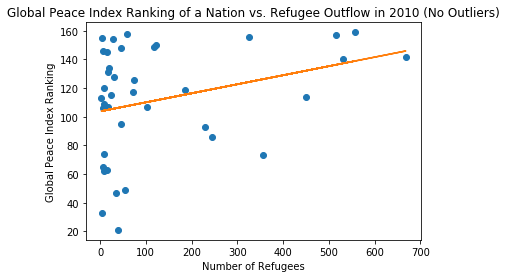

In [558]:
plt.plot(no_outliers_2010["2010"], no_outliers_2010["Ranking - 2010"], "o")
plt.plot(no_outliers_2010["2010"], y)
plt.xlabel("Number of Refugees")
plt.ylabel("Global Peace Index Ranking")
plt.title("Global Peace Index Ranking of a Nation vs. Refugee Outflow in 2010 (No Outliers)")
plt.show()

This plot looks a little more spread out, but we can still see that most countries are sending less than 200 refugees to the U.S. in 2010.  The $r^2$ value here is 0.093 which is definitely better than the previous plot, but it's still a very low value that shows the model is a poor fit for the data.

Overall, we observe that there's not really a correlation between refugee outflow from a country and that country's global peace index ranking. We see this where countries are sending under 100 refugees but have anywhere from a 20 to a 160 ranking.

## Country-wise Comparison of the Global Peace Index ranking to the Refugee Output in 2018

In [559]:
data_2018 = int_data[["Country", "2018", "Ranking - 2018"]].copy()
data_2018 = data_2018[(data_2018 != 0).all(1)]

In [560]:
model_2018 = LinearRegression().fit(data_2018[["2018"]], data_2018["Ranking - 2018"])

In [561]:
slope_2018 = model_2018.coef_[0]
intercept_2018 = model_2018.intercept_
y = slope_2018 * data_2018["2018"] + intercept_2018
print("Slope =", slope_2018)
print("Y-intercept =", intercept_2018)
print("r^2 =", model_2018.score(data_2018[["2018"]], data_2018["Ranking - 2018"]))

Slope = 0.006725463493687688
Y-intercept = 103.20376445499286
r^2 = 0.035492493186146334


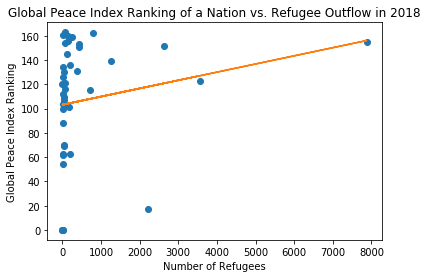

In [562]:
plt.plot(data_2018["2018"], data_2018["Ranking - 2018"], 'o')
plt.xlabel("Number of Refugees")
plt.ylabel("Global Peace Index Ranking")
plt.title("Global Peace Index Ranking of a Nation vs. Refugee Outflow in 2018")
plt.plot(data_2018["2018"], y)
plt.show()

This plot, much like the 2010, is heavily centered on the left side since most countries send less than 500 refugees. The $r^2$ value is 0.0205 which, again, is a very low value showing a poor model and nearly non-existent correlation.

Removing outliers:

In [563]:
# Determine the 10 nations with the largest refugee outflow
data_2018.nlargest(10, "2018")

,Country,2018,Ranking - 2018
15,Congo (Democratic Republic),7878.0,155
49,Myanmar,3555.0,123
66,Ukraine,2635.0,152
6,Bhutan,2228.0,17
24,Eritrea,1269.0,139
0,Afghanistan,805.0,162
22,El Salvador,725.0,115
52,Pakistan,441.0,151
53,Russia,437.0,153
26,Ethiopia,376.0,131


In [564]:
# Drop the 10 nations determined above
no_outliers_2018 = data_2018.drop([15, 49, 66, 6, 24, 0, 22, 52, 26])

In [565]:
no_outliers_2018_model = LinearRegression().fit(no_outliers_2018[["2018"]], no_outliers_2018["Ranking - 2018"])
no_outliers_2018_slope = no_outliers_2018_model.coef_[0]
no_outliers_2018_intercept = no_outliers_2018_model.intercept_
y = no_outliers_2018_slope * no_outliers_2018["2018"] + no_outliers_2018_intercept
print("Slope =", no_outliers_2018_slope)
print("Y-intercept =", no_outliers_2018_intercept)
print("r^2 =", no_outliers_2018_model.score(no_outliers_2018[["2018"]], no_outliers_2018["Ranking - 2018"]))

Slope = 0.22028644431223265
Y-intercept = 84.8107941310559
r^2 = 0.17697145962569616


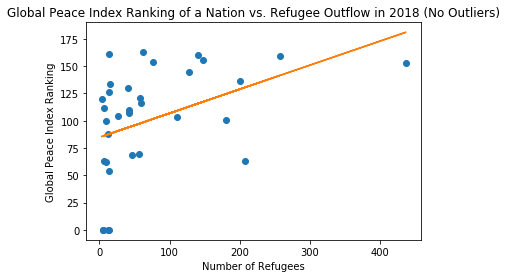

In [566]:
plt.plot(no_outliers_2018["2018"], no_outliers_2018["Ranking - 2018"], 'o')
plt.xlabel("Number of Refugees")
plt.ylabel("Global Peace Index Ranking")
plt.title("Global Peace Index Ranking of a Nation vs. Refugee Outflow in 2018 (No Outliers)")
plt.plot(no_outliers_2018["2018"], y)
plt.show()

This plot is a little more spread out and we can see our line has a steeper slope. The $r^2$ value here is 0.128 which is higher than before, showing an improvement, but still not a great model.

Overall, there's not really a correlation here either between refugee outflow in a country and its global peace index ranking. Similarly to the 2010 data, countries are sending less than 200 refugees but have varying rankings, anywhere from 20 to over 160.

## HDI vs. Refugee Outflow in 2010

In [567]:
hdi_2010 = int_data[["Country", "2010", "hdi_2010"]].copy()
hdi_2010 = hdi_2010[(hdi_2010 != 0).all(1)]

In [568]:
model_hdi_10 = LinearRegression().fit(hdi_2010[["2010"]], hdi_2010["hdi_2010"])
hdi_10_slope = model_hdi_10.coef_[0]
hdi_10_int = model_hdi_10.intercept_
y = hdi_10_slope * hdi_2010["2010"] + hdi_10_int
print("Slope =", hdi_10_slope)
print("Y-intercept =", hdi_10_int)
print("r^2 =", model_hdi_10.score(hdi_2010[["2010"]], hdi_2010["hdi_2010"]))

Slope = 1.0925587655498368e-06
Y-intercept = 0.5790297436691996
r^2 = 0.0009149874708650474


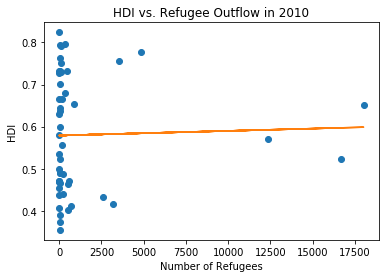

In [569]:
plt.plot(hdi_2010["2010"], hdi_2010["hdi_2010"], "o")
plt.plot(hdi_2010["2010"], y)
plt.xlabel("Number of Refugees")
plt.ylabel("HDI")
plt.title("HDI vs. Refugee Outflow in 2010")
plt.show()

Akin to our previous plots, the comparison of HDI scores of countries and their corresponding refugee outflow to the US is heavily concentrated along the left axis of the graph. In order to analyze any patterns that could be present in the absence of large outliers we conduct another analysis below.

**It is interesting to note that the countries sending the largest number of refugees in 2010 have an HDI score witin the range of 0.5 - 0.7, which are categorized as medium rankings. This contradicts our presumption that increased refugee outflows would correspond to low ranking HDIs**

Again, removing outliers:

In [570]:
# 10 nations with largest refugee outlfow
hdi_2010.nlargest(10, "2010")

,Country,2010,hdi_2010
35,Iraq,18016.0,0.652
49,Myanmar,16693.0,0.523
6,Bhutan,12363.0,0.571
19,Cuba,4818.0,0.776
34,Iran,3543.0,0.756
15,Congo (Democratic Republic),3174.0,0.416
24,Eritrea,2570.0,0.433
68,Vietnam,873.0,0.653
26,Ethiopia,668.0,0.412
60,Sudan,558.0,0.471


In [571]:
# Drop the 10 nations determined above
hdi_10_drop = hdi_2010.drop([35, 49, 6, 19, 34, 15, 24, 68, 26, 60])

In [572]:
hdi_10_drop_model = LinearRegression().fit(hdi_10_drop[["2010"]], hdi_10_drop["hdi_2010"])
drop_10_slope = hdi_10_drop_model.coef_[0]
drop_10_int = hdi_10_drop_model.intercept_
y = drop_10_slope * hdi_10_drop["2010"] + drop_10_int
print("Slope =", drop_10_slope)
print("Y-intercept =", drop_10_int)
print("r^2 =", hdi_10_drop_model.score(hdi_10_drop[["2010"]], hdi_10_drop["hdi_2010"]))

Slope = 1.2468088714985556e-05
Y-intercept = 0.5828003858085407
r^2 = 0.0001655247596019649


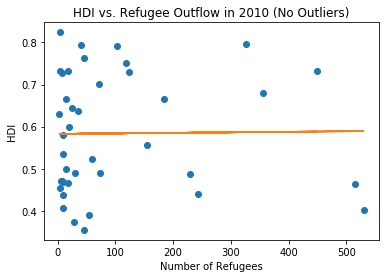

In [573]:
plt.plot(hdi_10_drop["2010"], hdi_10_drop["hdi_2010"], "o")
plt.plot(hdi_10_drop["2010"], y)
plt.xlabel("Number of Refugees")
plt.ylabel("HDI")
plt.title("HDI vs. Refugee Outflow in 2010 (No Outliers)")
plt.show()

Even in the absence of outliers,this model only has an r-squared value of 0.000165 indicating that HDI scores and refugee outflows for a given country in 2010 are not correlated.

## HDI vs. Refugee Outflow in 2018

In [574]:
hdi_2018 = int_data[["Country", "2018", "hdi_2018"]].copy()
hdi_2018 = hdi_2018[(hdi_2018 != 0).all(1)]

In [575]:
model_hdi_18 = LinearRegression().fit(hdi_2018[["2018"]], hdi_2018["hdi_2018"])
hdi_18_slope = model_hdi_18.coef_[0]
hdi_18_int = model_hdi_18.intercept_
y = hdi_18_slope * hdi_2018["2018"] + hdi_18_int
print("Slope =", hdi_18_slope)
print("Y-intercept =", hdi_18_int)
print("r^2 =", model_hdi_18.score(hdi_2018[["2018"]], hdi_2018["hdi_2018"]))

Slope = -1.3227894515558798e-05
Y-intercept = 0.6128787263928531
r^2 = 0.02173285757038823


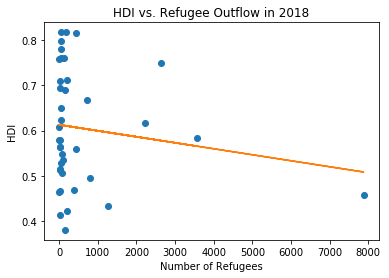

In [576]:
plt.plot(hdi_2018["2018"], hdi_2018["hdi_2018"], "o")
plt.plot(hdi_2018["2018"], y)
plt.xlabel("Number of Refugees")
plt.ylabel("HDI")
plt.title("HDI vs. Refugee Outflow in 2018")
plt.show()

The $r^2$ value is 0.022 which shows again, a poor correlation. Unlike the other plots we've created, this one has a negative slope, which would imply that as the number of refugees leaving a country increases, the HDI decreases. This is opposite of what we expected, but it's hard to tell how accurate this is given the outliers.

Dropping the outliers and renalyzing:

In [577]:
hdi_18_drop = hdi_2018.drop(list(hdi_2018.nlargest(10, "2018").index))

In [578]:
hdi_18_drop_model = LinearRegression().fit(hdi_18_drop[["2018"]], hdi_18_drop["hdi_2018"])
drop_18_slope = hdi_18_drop_model.coef_[0]
drop_18_int = hdi_18_drop_model.intercept_
y = drop_18_slope * hdi_18_drop["2018"] + drop_18_int
print("Slope =", drop_18_slope)
print("Y-intercept =", drop_18_int)
print("r^2 =", hdi_18_drop_model.score(hdi_18_drop[["2018"]], hdi_18_drop["hdi_2018"]))

Slope = 0.00021136033435164845
Y-intercept = 0.5995849950421387
r^2 = 0.010442704817192672


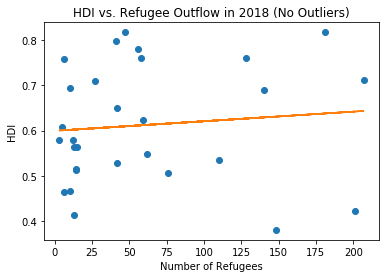

In [579]:
plt.plot(hdi_18_drop["2018"], hdi_18_drop["hdi_2018"], "o")
plt.plot(hdi_18_drop["2018"], y)
plt.xlabel("Number of Refugees")
plt.ylabel("HDI")
plt.title("HDI vs. Refugee Outflow in 2018 (No Outliers)")
plt.show()

The $r^2R value is 0.010 which is actually worse than the model with the outliers. This data, unlike the other data we've seen, is not heavily centered on the left, but kind of spread out throughout the plot. The slope is back to being positive as well, fitting our expectations.

## GPI (Global Peace Index) vs. Refugee Outflow in 2010

In [580]:
gpi_2010 = int_data[["Country", "2010", "Score - 2010"]].copy()
gpi_2010 = gpi_2010[(gpi_2010 != 0).all(1)]

In [581]:
gpi_model_10 = LinearRegression().fit(gpi_2010[["2010"]], gpi_2010["Score - 2010"])
gpi_slope_10 = gpi_model_10.coef_[0]
gpi_int_10 = gpi_model_10.intercept_
y = gpi_slope_10 * gpi_2010["2010"] + gpi_int_10
print("Slope =", gpi_slope_10)
print("Y-intercept =", gpi_int_10)
print("r^2 =", gpi_model_10.score(gpi_2010[["2010"]], gpi_2010["Score - 2010"]))

Slope = 2.908779249264781e-05
Y-intercept = 2.3719302052653513
r^2 = 0.05656976220762322


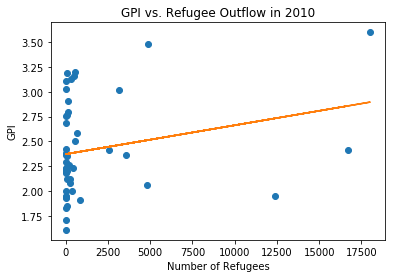

In [582]:
plt.plot(gpi_2010["2010"], gpi_2010["Score - 2010"], "o")
plt.plot(gpi_2010["2010"], y)
plt.xlabel("Number of Refugees")
plt.ylabel("GPI")
plt.title("GPI vs. Refugee Outflow in 2010")
plt.show()

The $r^2$ here is 0.057 which, again, is fairly low due to the outliers as we can see that the GPI scores vary while most countries have a refugee outflow in the 100s and 200s.

Dropping outliers:

In [583]:
gpi_2010.nlargest(10, "2010")

,Country,2010,Score - 2010
35,Iraq,18016.0,3.600
49,Myanmar,16693.0,2.413
6,Bhutan,12363.0,1.950
57,Somalia,4884.0,3.485
19,Cuba,4818.0,2.062
34,Iran,3543.0,2.360
15,Congo (Democratic Republic),3174.0,3.023
24,Eritrea,2570.0,2.409
68,Vietnam,873.0,1.905
26,Ethiopia,668.0,2.581


In [584]:
# Drop the 10 nations determined above
gpi_10_drop = gpi_2010.drop([35, 49, 6, 57, 19, 34, 15, 24, 68, 26])

In [585]:
gpi_10_drop_model = LinearRegression().fit(gpi_10_drop[["2010"]], gpi_10_drop["Score - 2010"])
drop_10_slope = gpi_10_drop_model.coef_[0]
drop_10_int = gpi_10_drop_model.intercept_
y = drop_10_slope * gpi_10_drop["2010"] + drop_10_int
print("Slope =", drop_10_slope)
print("Y-intercept =", drop_10_int)
print("r^2 =", gpi_10_drop_model.score(gpi_10_drop[["2010"]], gpi_10_drop["Score - 2010"]))

Slope = 0.0009014613981811672
Y-intercept = 2.2682492449842373
r^2 = 0.11172031369239643


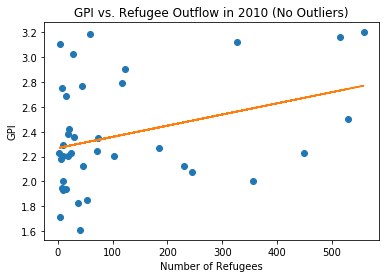

In [586]:
plt.plot(gpi_10_drop["2010"], gpi_10_drop["Score - 2010"], "o")
plt.plot(gpi_10_drop["2010"], y)
plt.xlabel("Number of Refugees")
plt.ylabel("GPI")
plt.title("GPI vs. Refugee Outflow in 2010 (No Outliers)")
plt.show()

The $r^2$ value is 0.112 which is a step in the right direction, but again not a strong correlation due to the data being centered on the left of the plot.

## GPI vs. Refugee Outflow in 2018

In [587]:
gpi_2018 = int_data[["Country", "2018", "Score - 2018"]].copy()
gpi_2018 = gpi_2018[(gpi_2018 != 0).all(1)]

In [588]:
gpi_model_18 = LinearRegression().fit(gpi_2018[["2018"]], gpi_2018["Score - 2018"])
gpi_slope_18 = gpi_model_18.coef_[0]
gpi_int_18 = gpi_model_18.intercept_
y = gpi_slope_18 * gpi_2018["2018"] + gpi_int_18
print("Slope =", gpi_slope_18)
print("Y-intercept =", gpi_int_18)
print("r^2 =", gpi_model_18.score(gpi_2018[["2018"]], gpi_2018["Score - 2018"]))

Slope = 0.00015638185306365515
Y-intercept = 2.145449864971883
r^2 = 0.04770728330707563


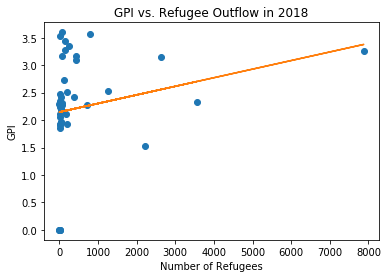

In [589]:
plt.plot(gpi_2018["2018"], gpi_2018["Score - 2018"], "o")
plt.plot(gpi_2018["2018"], y)
plt.xlabel("Number of Refugees")
plt.ylabel("GPI")
plt.title("GPI vs. Refugee Outflow in 2018")
plt.show()

The $r^2$ is 0.0477 which, again, doesn't show a strong correlation between refugees and GPI.

Since the plot below and $r^2$ value below show some promise, we decided to use the permutation idea from Homework 8 and apply it here with randomization, hopefully showing no significant correlation:

In [615]:
# provided code from Homework 8
def permuted_y():
    return np.random.permutation(gpi_2018["Score - 2018"].copy())

In [616]:
slopes = np.zeros(1000)
for num in range(len(slopes)):
    model = LinearRegression().fit(gpi_2018[["2018"]], permuted_y())
    slopes[num] = model.coef_

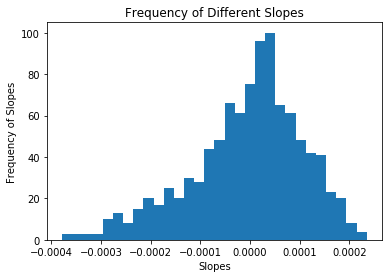

In [617]:
plt.hist(slopes, bins=30)
plt.xlabel("Slopes")
plt.ylabel("Frequency of Slopes")
plt.title("Frequency of Different Slopes")
plt.show()

In [618]:
print("The average of slopes is", slopes.mean())

The average of slopes is -6.08421285465112e-06


Our slope was 0.000156 or 1.56e-4. The average slope in the permutation is negative while our calculated one using linear regression is positive, so they have opposite correlations. This is interesting and shows true randomization given that we inputted columns from the dataset we were already using and got different correlations, one being positive and one being negative.

Removing outliers:

In [590]:
# Drop the 10 nations determined above
gpi_18_drop = gpi_2018.drop(list(gpi_2018.nlargest(10, "2018").index))

In [591]:
gpi_18_drop_model = LinearRegression().fit(gpi_18_drop[["2018"]], gpi_18_drop["Score - 2018"])
drop_18_slope = gpi_18_drop_model.coef_[0]
drop_18_int = gpi_18_drop_model.intercept_
y = drop_18_slope * gpi_18_drop["2018"] + drop_18_int
print("Slope =", drop_18_slope)
print("Y-intercept =", drop_18_int)
print("r^2 =", gpi_18_drop_model.score(gpi_18_drop[["2018"]], gpi_18_drop["Score - 2018"]))

Slope = 0.006272760508912467
Y-intercept = 1.6759694928749003
r^2 = 0.18135581590206984


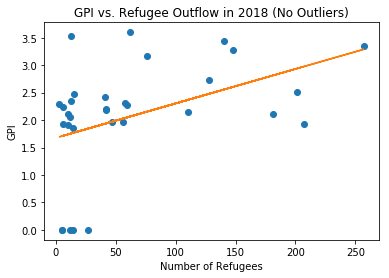

In [592]:
plt.plot(gpi_18_drop["2018"], gpi_18_drop["Score - 2018"], "o")
plt.plot(gpi_18_drop["2018"], y)
plt.xlabel("Number of Refugees")
plt.ylabel("GPI")
plt.title("GPI vs. Refugee Outflow in 2018 (No Outliers)")
plt.show()

The $r^2$ has a value of 0.181 which is a good increase and shows more of a match between the model and data. Again, however, there's still not a strong correlation between GPI and refguee outflow.

Here's the random permutations for the data with no outliers:

In [605]:
# provided code from Homework 8
def permuted_y():
    return np.random.permutation(gpi_18_drop["Score - 2018"].copy())

In [610]:
slopes_drop = np.zeros(1000)
for num in range(len(slopes)):
    model = LinearRegression().fit(gpi_18_drop[["2018"]], permuted_y())
    slopes_drop[num] = model.coef_

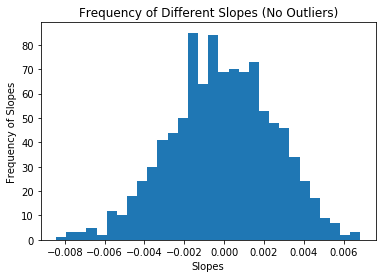

In [613]:
plt.hist(slopes_drop, bins=30)
plt.xlabel("Slopes")
plt.ylabel("Frequency of Slopes")
plt.title("Frequency of Different Slopes (No Outliers)")
plt.show()

In [614]:
print("Mean of slopes is", slopes.mean())

Mean of slopes is 1.7340994101685034e-05


Our slope was 0.00627 or 6.27e-3. The average slope of the random permutations is slightly larger than our actual slope, which shows a slightly more positive correlation. However our slope is not within the range of the histogram above showing that our data produced values we weren't necessarily expecting.

## Comparison of refugee outflow change and HDI score change between 2010-2018

Given that our comparisons of the 2010 and 2018 refugee numbers failed to show any moderate or strong correlation, we decided that it may be valuable to observe if the factor of change in refugees [(refugees in 2018 - refugees on 2010)/ refugees in 2010] and that if countries' HDI showed any patterns.

In [593]:
# creating data on change in refugee outflows and change in hdi
change_data = int_data[["Country", "hdichange2010-2018", "refugee_change"]].copy()

#there are some countries where we cannot calculate the rate of change of refugees due to witholding of data either
#during 2010 or 2018, so we need to drop those countries. Similarly, there are countries where HDI change is not
#able to be computed so we also need to drop those from our analysis.

change_data = change_data[(change_data != 0).all(1)]


In [594]:
change_model = LinearRegression().fit(change_data[["hdichange2010-2018"]], change_data["refugee_change"])
change_model_slope = change_model.coef_[0]
change_model_intercept = change_model.intercept_
y = change_model_slope * change_data["hdichange2010-2018"] + change_model_intercept 
print("Slope =", change_model_slope)
print("Y-intercept =", change_model_intercept)
print("r^2 =", change_model.score(change_data[["hdichange2010-2018"]], change_data["refugee_change"]))

Slope = -0.03639175538419436
Y-intercept = 0.13664610722795628
r^2 = 0.00030490580878239637


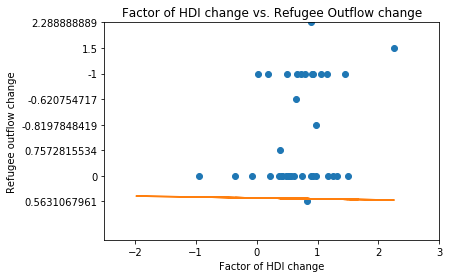

In [595]:
plt.plot(change_data["hdichange2010-2018"], change_data["refugee_change"],'o')
plt.xlabel("Factor of HDI change")
plt.ylabel("Refugee outflow change")
plt.title("Factor of HDI change vs. Refugee Outflow change")
plt.xlim(-2.5,3)
plt.ylim(-1.5,7)
plt.plot(change_data["hdichange2010-2018"],y)
plt.show()

As we can observe from both the scatter plot and the r-squared valule of 0.00099, modelling refugee outflow change from 2010 to 2018 based on an individual country's change in HDI during this period is not an accurate model and we cannot discern a possible correlation.

# Conclusion

Examining the country-specific refugee outflow data to the US from 2010 to 2018, we saw a strikingly declining trend that reflects changes in the US administration’s stance on immigration policy. The US has fallen far from its position as one of the top refugee resettling countries, and refugee numbers are projected to decrease even more so.

Furthermore, upon analyzing the HDI and GPI of countries we cannot establish a model that represents global trends (e.g. no real correlation was found). HDI and GPI change during the 2010 to 2018 period also failed to show any correlation to refugee outflow changes for specific countries.

This was surprising to us as we expected that as the number of refugees leaving a country increased, the human development index and global peace index would decrease (since lower scsores on HDI and GPI would likely indicate worse conditions that might instigate more refugee outflow from said country). As discussed and shown, this was not the case at all. Most HDI and GPI values were evenly spread among countries with low and high counts of refugees.

One limitation of the data, that also provides a basis for further research, is that with the US’ decreasing cap on accepting refugees the number of refugee outflows examined here may not be representative of the actual refugee outflows of any given country. For example, though only 16 Yemeni refugees were sent to the US in 2015, Yemen actually had a much higher rate of refugee outflow with 110,167 seeking refugee in countries like Saudi Arabia, Djibouti, Ethiopia, Somalia (UNHCR). Therefore, more insight could be gained by comparing HDI or GPI with the total refugee outflow for countries.

Ultimately, refugee flows fluctuate year by year affected by violence, political instability, or discriminatory persecution. We’ve come to the conclusion that analyzing only the refugee flows to the US is not reflective of global conditions but more so of the US immigration system and political stances.


## Source Code

Our source code can be found at this github repository: https://github.coecis.cornell.edu/pp379/INFO2950-Final-Project

## Acknowledgements

We want to thank the TAs who helped us (esp Irena for saving the day with the dataset merging that gave us such a hassle) and Prof Mimno whose flexibility and compassion has been a great help during this turbulent semester.

Our data was gathered from a combination of these sources:

Furthermore some other help was achieved through:

https://stackoverflow.com/questions/27020312/drop-row-in-pandas-dataframe-if-any-value-in-the-row-equals-zero/27020741

For the contextual information about refugee flows we turned to these sources:

https://www.unhcr.org/561cf4239.pdf

https://www.pewresearch.org/fact-tank/2019/10/07/key-facts-about-refugees-to-the-u-s/

For our dataset information:

https://www.dhs.gov/immigration-statistics/refugees-asylees

http://visionofhumanity.org/indexes/global-peace-index/

http://hdr.undp.org/en/data